In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configurar visualización de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Cargar el archivo data_encoded2.csv
data = pd.read_csv("../data/processed/data_encoded2.csv")

# Ver las primeras filas del dataset
data.head()


,PorcentajeCumplimiento,Estructura_ALIPEL 50,Estructura_BIOPAQUE,Estructura_BOPA/BOPA/COEXT. HBA (PE-EVOH),Estructura_BOPA/BOPA/PEBD,Estructura_BOPA/COEXT. HBA (PE-EVOH),Estructura_BOPA/COEXT. HBA (PE-EVOH) ABRE FACIL,Estructura_BOPA/FLEXIBLE (PA-PE),Estructura_BOPA/FLEXIBLE PCR (PA-PE),Estructura_BOPA/PEADTS,...,Impreso_SI,Calibre_>100,Valvula_NO APLICA,Valvula_SI,GradoTroquel_GRADO BAJO,GradoTroquel_NO APLICA,GradoTroquel_NO TROQUEL,GradoTroquel_TROQUEL FORMA,UsoZipper_NO APLICA,UsoZipper_SI
0,0.214,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
1,0.215,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,False,True,False
2,0.216,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
3,0.220,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
4,0.221,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True


In [4]:
# Resumen estadístico de los datos
data.describe()


,PorcentajeCumplimiento
count,27748.000000
mean,0.995748
std,0.099352
min,0.214000
25%,0.961000
50%,1.016000
75%,1.053000
max,1.199000


In [5]:
# Verificar si hay valores faltantes en el dataset
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values[missing_values > 0])


Valores faltantes por columna:
 Series([], dtype: int64)


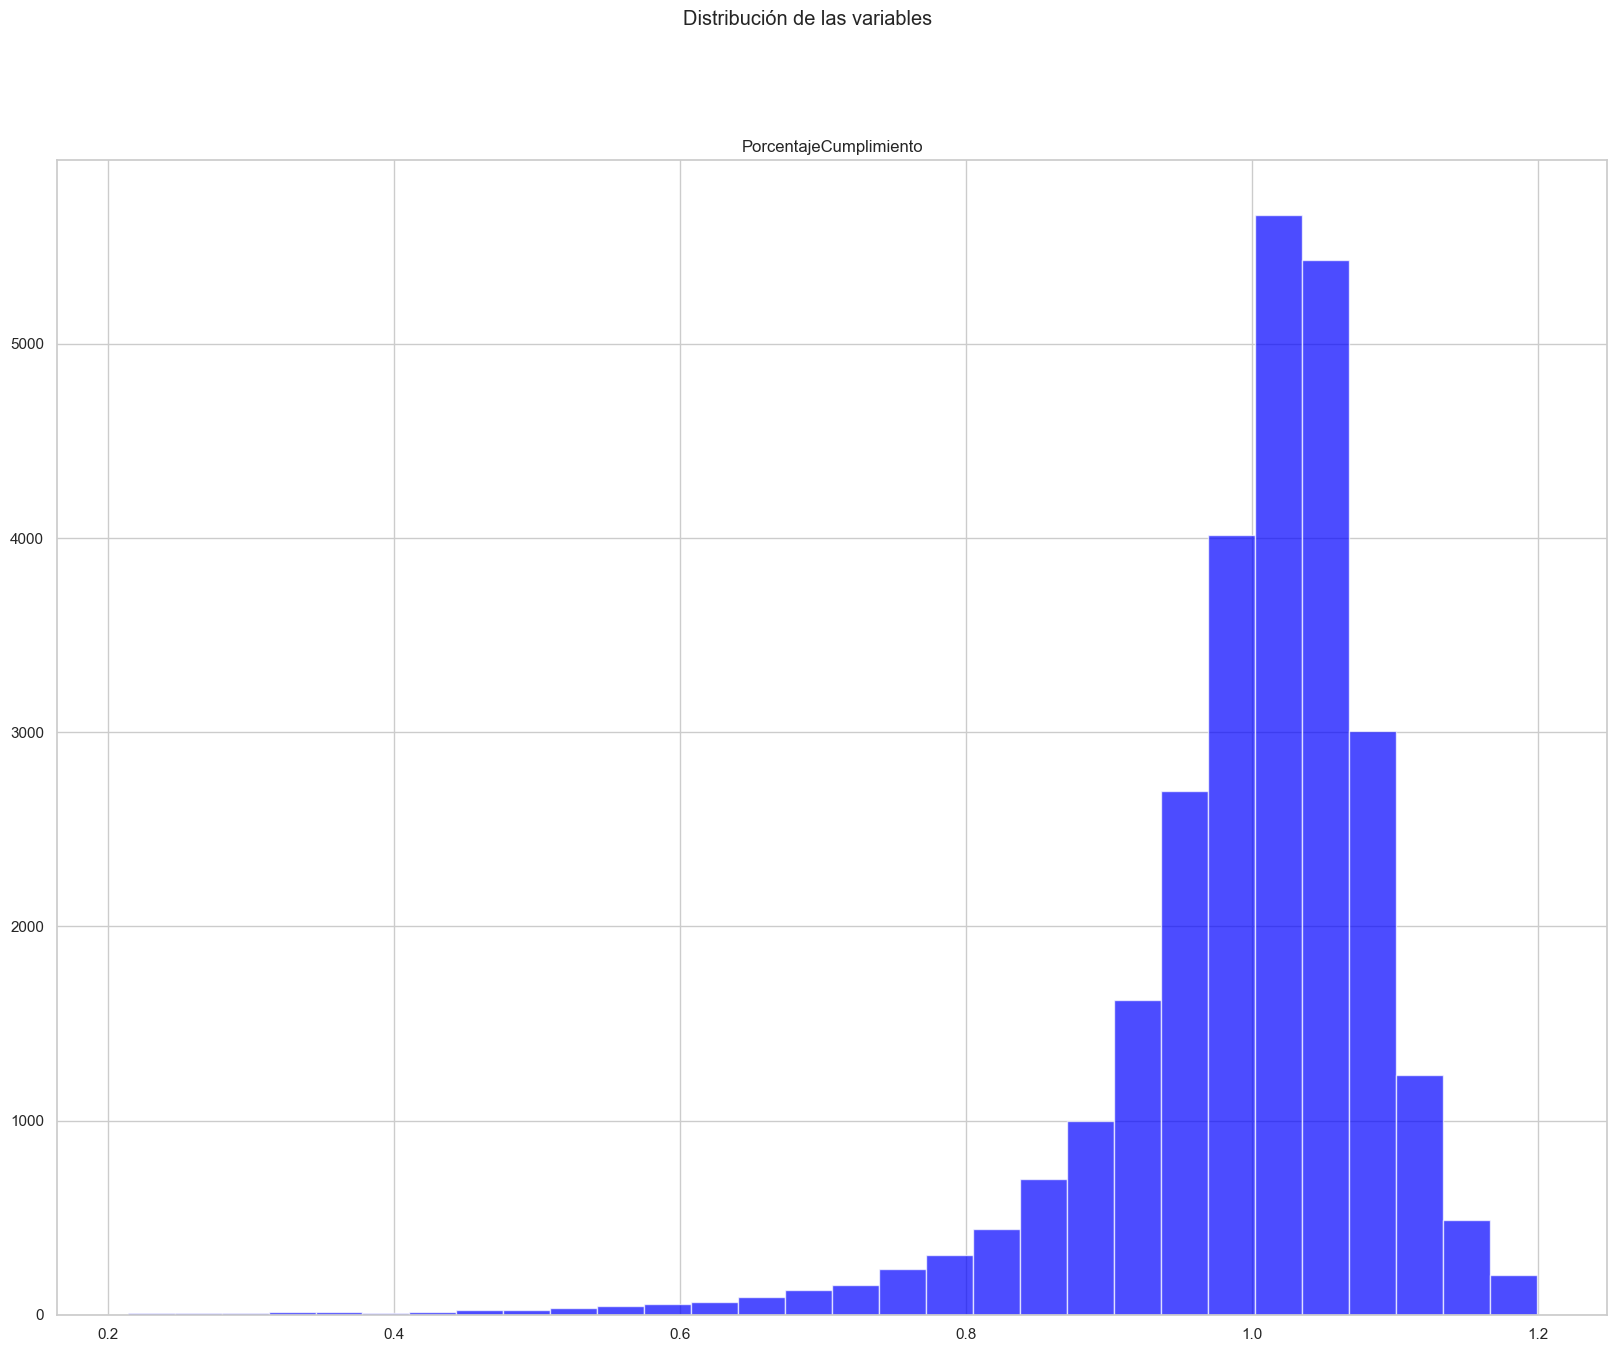

In [7]:
# Histograma de todas las columnas
data.hist(bins=30, figsize=(20, 15), color='blue', alpha=0.7)
plt.suptitle("Distribución de las variables")
plt.show()


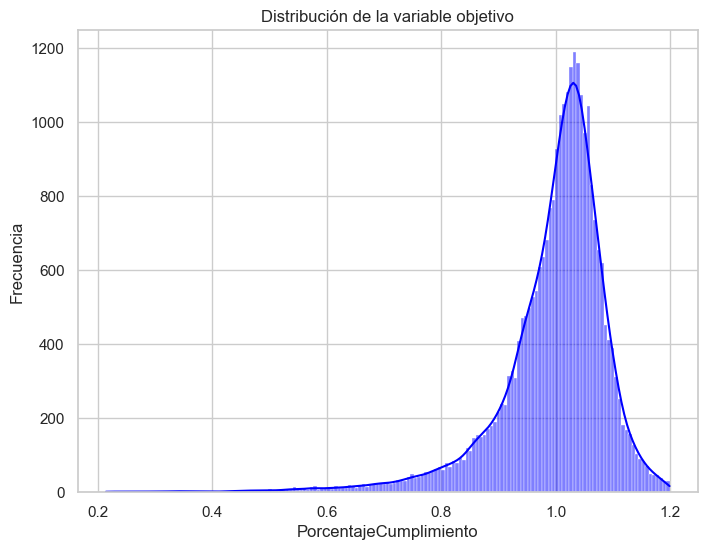

Skewness: -2.1473749535264517
Kurtosis: 8.52952856796416
Shapiro-Wilk Test: Estadístico=0.8481489013602397, p-valor=7.642407343201627e-94
D'Agostino's K^2 Test: Estadístico=13255.053909273418, p-valor=0.0
Kolmogorov-Smirnov Test: Estadístico=0.12264377674108362, p-valor=0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27748.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# Verificar la normalidad de la variable objetivo (PorcentajeCumplimiento)
target = 'PorcentajeCumplimiento'

# Histograma de la variable objetivo
plt.figure(figsize=(8, 6))
sns.histplot(data[target], kde=True, color='blue')
plt.title("Distribución de la variable objetivo")
plt.xlabel(target)
plt.ylabel("Frecuencia")
plt.show()

# Pruebas de normalidad para la variable objetivo
print(f"Skewness: {skew(data[target])}")
print(f"Kurtosis: {kurtosis(data[target])}")

# Shapiro-Wilk Test
stat, p = shapiro(data[target])
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p}")

# D'Agostino's K^2 Test
stat, p = normaltest(data[target])
print(f"D'Agostino's K^2 Test: Estadístico={stat}, p-valor={p}")

# Kolmogorov-Smirnov Test
stat, p = kstest(data[target], 'norm', args=(data[target].mean(), data[target].std()))
print(f"Kolmogorov-Smirnov Test: Estadístico={stat}, p-valor={p}")


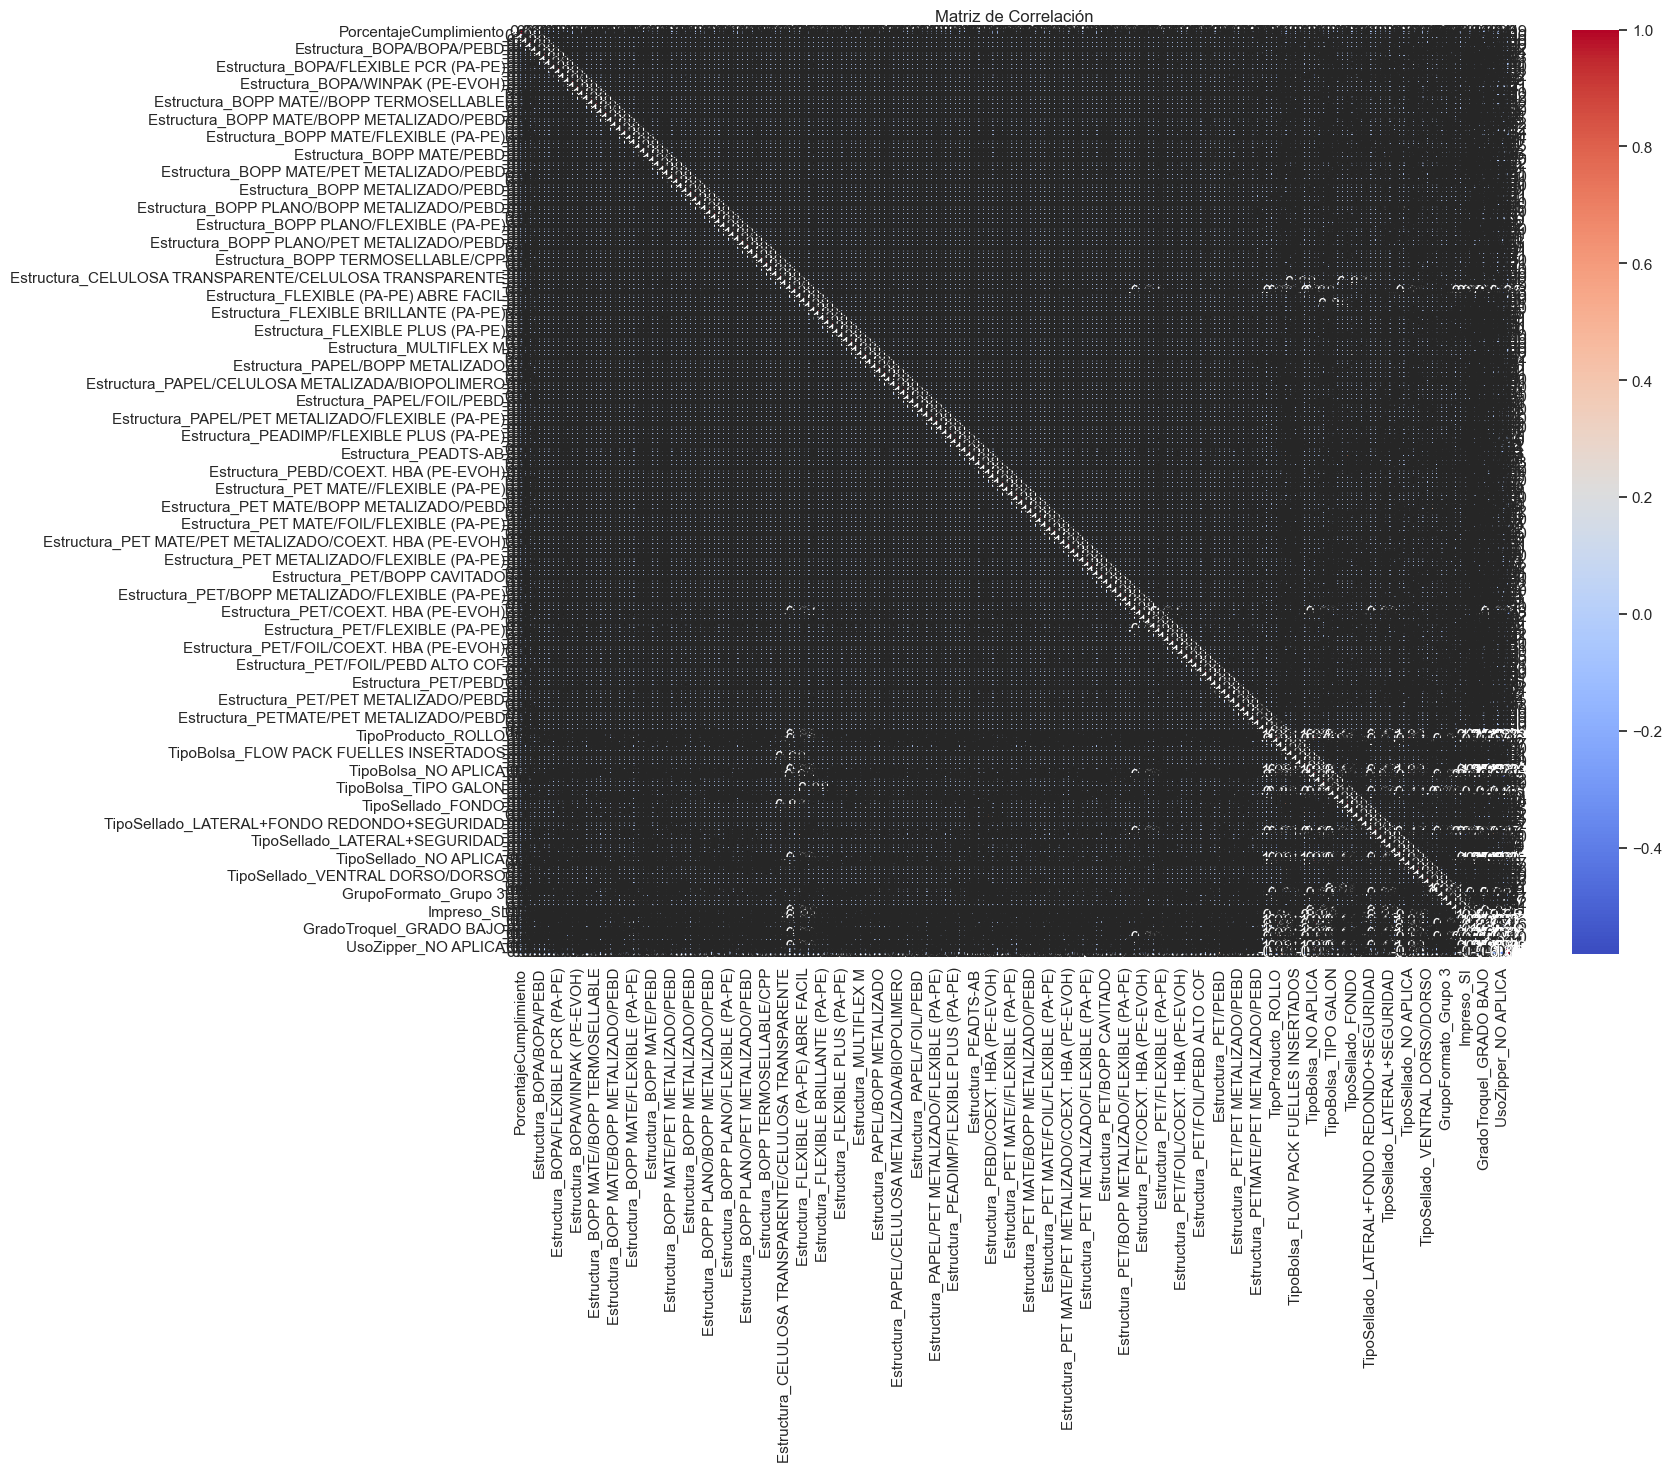

In [9]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Generar un heatmap de la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


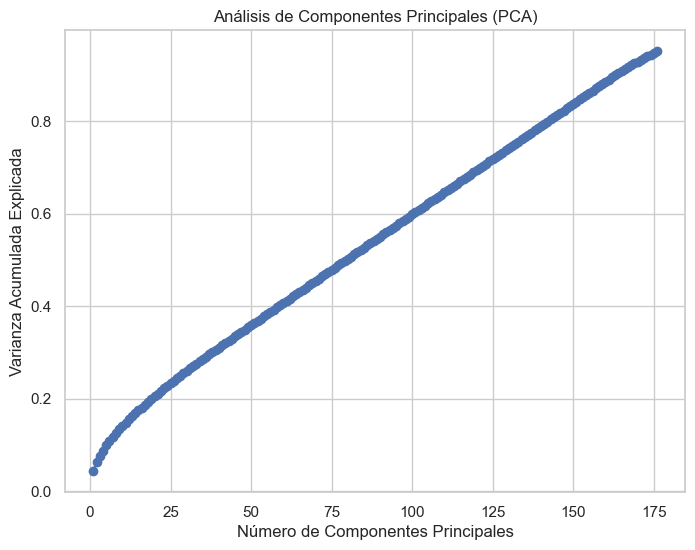

In [10]:
# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=[target]))

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
data_pca = pca.fit_transform(data_scaled)

# Explicar la varianza acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.title("Análisis de Componentes Principales (PCA)")
plt.grid(True)
plt.show()


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada característica
vif_data = pd.DataFrame()
vif_data["Feature"] = data.drop(columns=[target]).columns
vif_data["VIF"] = [variance_inflation_factor(data.drop(columns=[target]).values, i) for i in range(len(data.drop(columns=[target]).columns))]

print(vif_data)


                                       Feature        VIF
0                         Estructura_ALIPEL 50   1.432960
1                          Estructura_BIOPAQUE   1.371024
2    Estructura_BOPA/BOPA/COEXT. HBA (PE-EVOH)   1.380585
3                    Estructura_BOPA/BOPA/PEBD   0.386970
4         Estructura_BOPA/COEXT. HBA (PE-EVOH)   0.415454
..                                         ...        ...
204                     GradoTroquel_NO APLICA   4.693059
205                    GradoTroquel_NO TROQUEL   0.000622
206                 GradoTroquel_TROQUEL FORMA   0.002792
207                        UsoZipper_NO APLICA  11.273707
208                               UsoZipper_SI   0.000870

[209 rows x 2 columns]


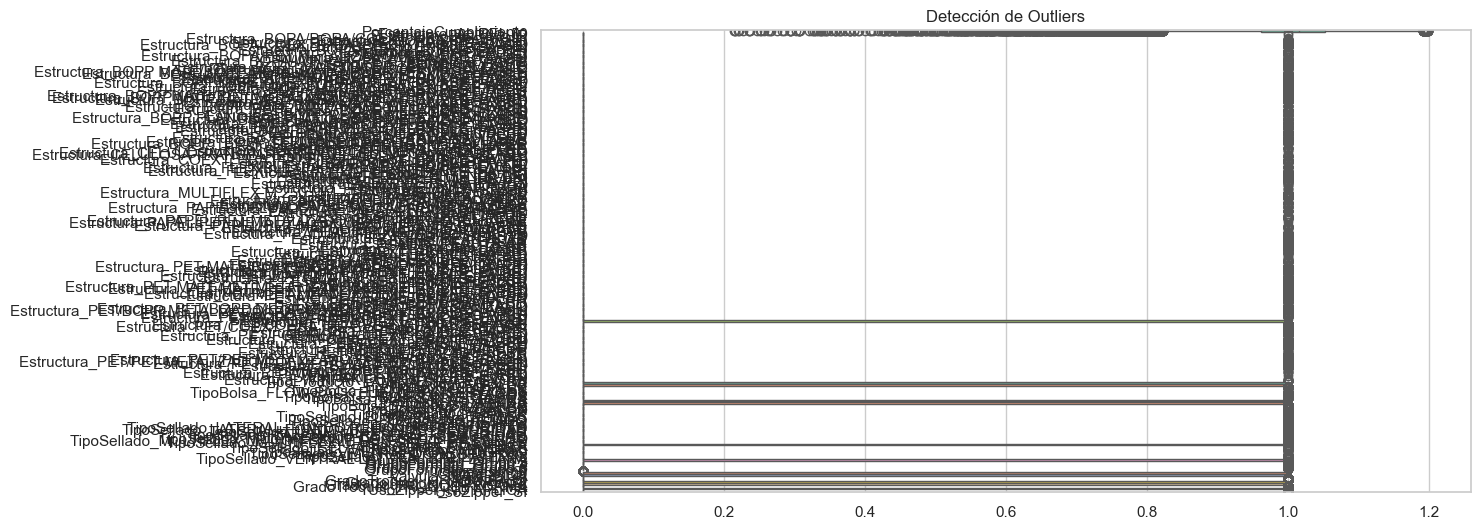

In [12]:
# Gráfico de caja (boxplot) para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Detección de Outliers")
plt.show()


Lower bound: 0.823, Upper bound: 1.1909999999999998
Número de outliers: 1522


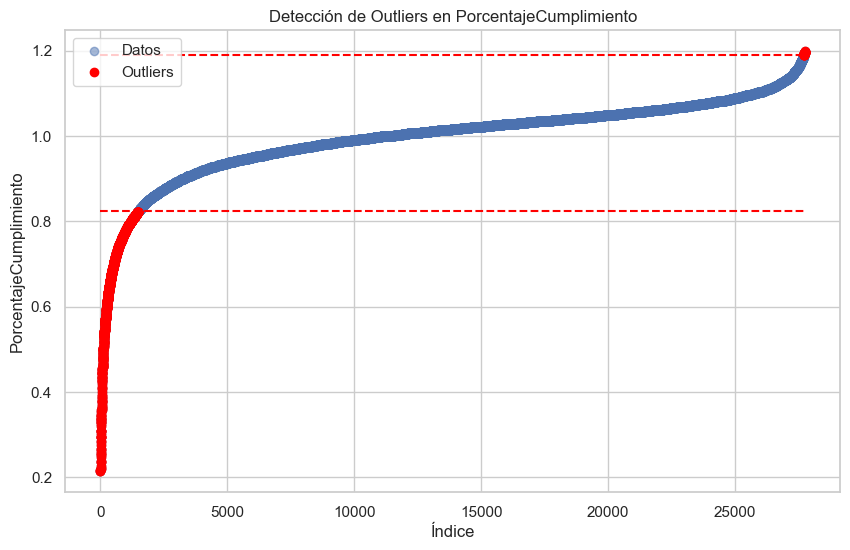

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos procesados
data = pd.read_csv("../data/processed/data_encoded2.csv")

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = data['PorcentajeCumplimiento'].quantile(0.25)
Q3 = data['PorcentajeCumplimiento'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Identificar outliers
outliers = data[(data['PorcentajeCumplimiento'] < lower_bound) | (data['PorcentajeCumplimiento'] > upper_bound)]

# Mostrar el número de outliers
print(f"Número de outliers: {len(outliers)}")

# Visualizar los outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['PorcentajeCumplimiento'], alpha=0.5, label='Datos')
plt.scatter(outliers.index, outliers['PorcentajeCumplimiento'], color='red', label='Outliers')
plt.hlines([lower_bound, upper_bound], xmin=0, xmax=len(data), colors='red', linestyles='dashed')
plt.xlabel('Índice')
plt.ylabel('PorcentajeCumplimiento')
plt.title('Detección de Outliers en PorcentajeCumplimiento')
plt.legend()
plt.show()


Número de filas originales: 27748
Número de filas después de eliminar outliers: 26226


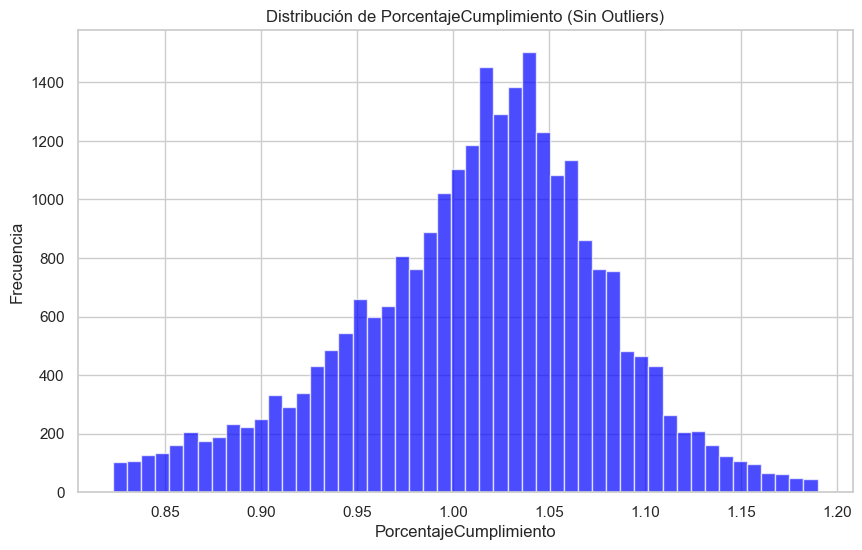

In [15]:
# Eliminar outliers
data_cleaned = data[(data['PorcentajeCumplimiento'] >= lower_bound) & (data['PorcentajeCumplimiento'] <= upper_bound)]

# Mostrar el número de filas antes y después de la eliminación
print(f"Número de filas originales: {len(data)}")
print(f"Número de filas después de eliminar outliers: {len(data_cleaned)}")

# Guardar los datos limpiados
data_cleaned.to_csv("../data/processed/data_cleaned_no_outliers.csv", index=False)

# Visualizar la distribución después de eliminar outliers
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['PorcentajeCumplimiento'], bins=50, color='blue', alpha=0.7)
plt.xlabel('PorcentajeCumplimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de PorcentajeCumplimiento (Sin Outliers)')
plt.show()
